## <span style="color:blue"> Ex 4 - Stefano Schmidt </span>

For running the simulation of Molecular Dynamics a new class `particle_simulator` was implemented - its declaration is in file **particle_simulator.h** and its definition in  **particle_simulator.cpp** both in folder **particle_simulator**. <br>
The class is more general than required for sampling from the NVE ensamble distribution. The reason for that is to make the class suitable also for sampling from NVT ensamble as asked in exercise 7.
The class holds a number of methods to configure the initial system from and to make measures of various quantities. It provides as well methods for writing some quantities to file. The class is used in the same fashion both for NVE and NVT sampling; the only difference consists in the method Move() which creates a new configuration for the system using two differents methods (Verlet for the NVE and Metropolis/Gibbs for NVT). <br>
The initialization of the simulation consist in setting some physical parameters (i.e. particle number, particle density and temperature) some constant useful for the simulation (i.e. the magnitude or radial cut-off for the potential and the intergation step) and some constants for the the measurement procedures (i.e. the number of measures to be hold in each block and the number of bins for the histogram of g(r) ). The input file must have the following structure.
- `type` ("NVE" or "NVT")
- `temp` (temperature);
- `npart`(# particle);
- `rho` (density);
- `rcut` (cut off radius);
- `delta` (integration step/Metropolis step);
- `n_meas` (measure to be put in a block);
- `n_bins` (#bins for g(r) histogram);

The initial particle configuration can be specified in a separate file togheter with an (eventual) initial old configuration (only for the NVE case).<br>
The code is made to perform measures of the following quantities: **E_tot, E_kin, E_pot, virial, Temp, P**; those quantities (and their uncertainties) are returned by the method `get_measures()` in a matrix layout. All quantities are intensive (i.e. don't depend on the size of the system) and are expressed in LJ units.<br>
An histogram for g(r) is returned by the method `get_g_hist()` There is the possibility of writing the two previous quantities to a file.


### Exercise 4.4
With the class `particle_simulator` is easy to simulate a LJ fluid. The simulation is performed in the file **ex_4.cpp**. For each of the rquired physical situation a different input file is used while the same initial particle configuration is given to all the simulation. The phase of the system (solidi, liquid or gas) shall be given as a parameter when lanching the program.<br>
To find a configuration matching the initial temperature it has been used the method `find_eq_temperature()` which iteratively change the average kinetic energy until the required equilibrium temperature is manteined over a long number of integration time step.<br>
The simulations for different physical condition are performed with $N=108$ particles and with $M=5000$ integration time step. The results are saved in file **/out/avg_physcond.dat** where physcond stands for the physical condition in which the simulation is performed (liquid, gas or solid). Each file has the following header:
**rho, [E_tot], [E_kin], [E_pot], [virial], [Temp], [P], time** where [..] denotes a quantity with an uncertainty.<br>
The quantities  $E_{tot}/N$, $E_{kin}/N$, $E_{pot}/N$, $P$ and $T$ are plotted as a function of the time step of the simulation. The uncertainties are computed with $L=25$ data per block.
Function `make_plots` in file **../particle_simulator/plot_helper.py** is useful to do so. Since the plot are done in SI units it accepts as arguments the values of $\sigma$(in nm), $\epsilon /k_{B}$ (in Kelvin) and $m$ (in amu). <BR>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../particle_simulator/') #to get plot helper
from plot_helper import *

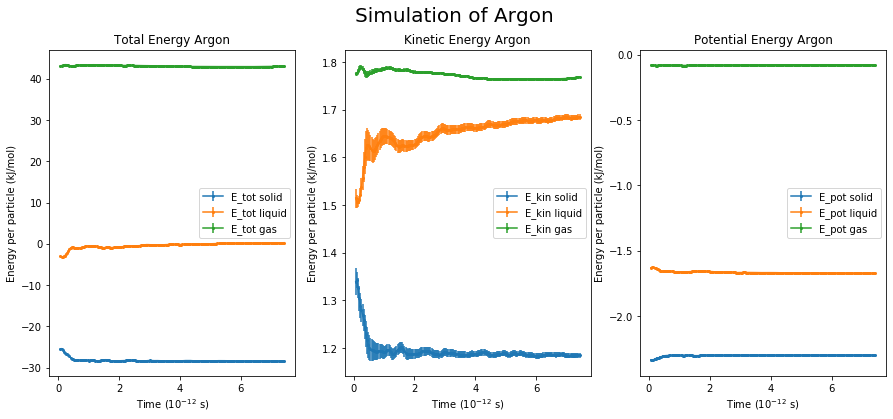

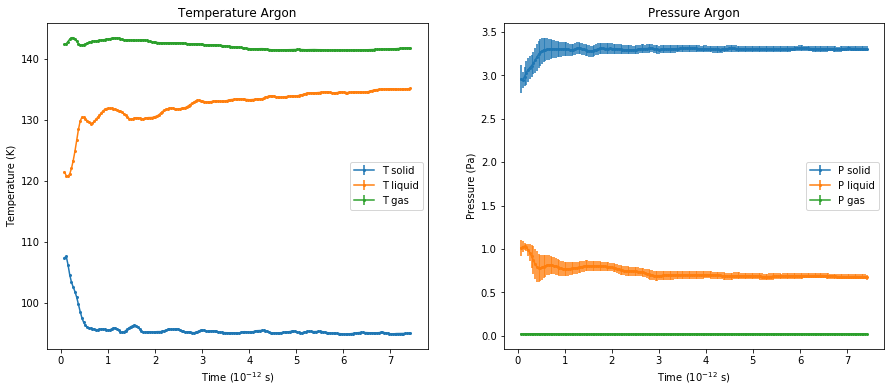

In [2]:
make_plots("Argon", sigma=0.34, epsilon_kb = 120, m= 39.948)

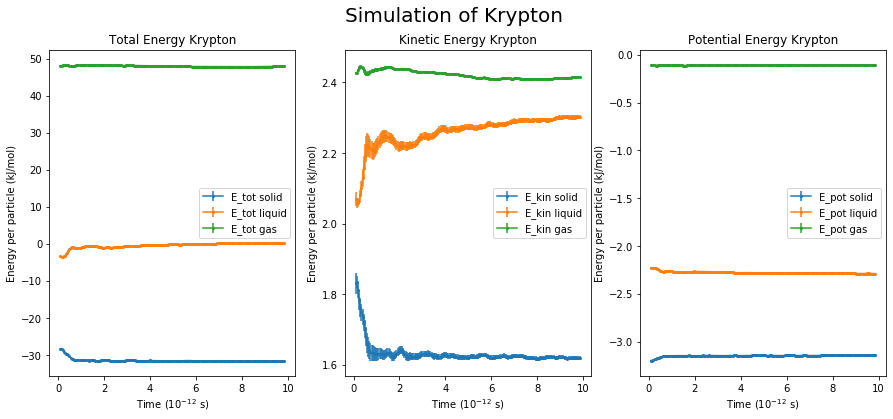

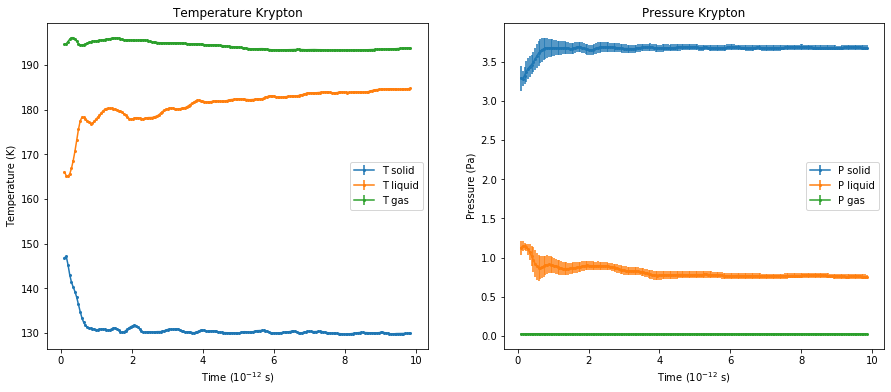

In [3]:
make_plots("Krypton", sigma=0.364, epsilon_kb = 164, m=83.798)

Some sparse observations:
 - as expected the potential energy per mole increases for more bounded phase of matter: gas has very few potential energy while solid has a lot; for kinetic energy the situation is reversed.<br>
 - kinetic energy and temperature have the same behaviour (a part from a scale factor): they measure the same thing!
 - kinetic energy is the form of energy which has the higher uncertainty
 - pressure of a gas is much lower than the pressure in a solid or a liquid; the reason for that is a lower virial term due to a very low bound. For the simulated conditions it holds: $\frac{P_{solid}}{P_{gas}} \approx 10^2$
 - pressure suffers of the same inaccuracies of kinetic energy: the incertainties are quite high.